# RELAZIONE FINALE  
## Analisi diffusione COVID-19 nel mondo

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

In [3]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

dotenv.load_dotenv(override=True)
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = create_engine(conn_string)

In [5]:
file_path = "C:/Users/HP/Downloads/owid-covid-data.csv"
covid = pd.read_csv(file_path)
covid.head(10)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
5      AFG      Asia  Afghanistan  2020-01-10          NaN        0.0   
6      AFG      Asia  Afghanistan  2020-01-11          NaN        0.0   
7      AFG      Asia  Afghanistan  2020-01-12          NaN        0.0   
8      AFG      Asia  Afghanistan  2020-01-13          NaN        0.0   
9      AFG      Asia  Afghanistan  2020-01-14          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   
5                 0.0           NaN         0.0                  0.0  ...   
6                 0.0           NaN         0.0                  0.0  ...   
7                 0.0           NaN         0.0                  0.0  ...   
8                 0.0           NaN         0.0                  0.0  ...   
9                 0.0           NaN         0.0                  0.0  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   
5           NaN                  37.746                         0.5   
6           NaN                  37.746                         0.5   
7           NaN                  37.746                         0.5   
8           NaN                  37.746                         0.5   
9           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   
5            64.83                    0.511  41128772.0   
6            64.83                    0.511  41128772.0   
7            64.83                    0.511  41128772.0   
8            64.83                    0.511  41128772.0   
9            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
5                                   NaN                          NaN   
6                                   NaN                          NaN   
7                                   NaN                          NaN   
8                                   NaN                          NaN   
9                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  

### Si richiede di verificare le dimensioni del dataset e i relativi metadati.

In [7]:
print(f"Le dimensioni del database del COVID mondiale qui presente sono di: \n{covid.shape[0]} righe e di {covid.shape[1]} colonne.")

Le dimensioni del database del COVID mondiale qui presente sono di: 
409562 righe e di 67 colonne.


In [9]:
print(f"In merito ai metadati, nel dataset sono presenti le seguenti colonne: \n {covid.columns}.")

In merito ai metadati, nel dataset sono presenti le seguenti colonne: 
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boos

### Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente.  
#### Si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente.

In [11]:
covid_tot_continent = covid.groupby("continent")["new_cases"].sum()
print(covid_tot_continent)

continent
Africa            13144264.0
Asia             301515124.0
Europe           252672573.0
North America    124572945.0
Oceania           14973467.0
South America     68832646.0
Name: new_cases, dtype: float64


### Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente).

Innanzitutto creo le variabili con i nomi dei continenti, facendo attenzione a
raggruppare le righe dove il nome è riportato sulla colonna "continent" con le righe
dove il nome è riportato sulla colonna "location".  
Sotto ogni variabile creo un'altra variabile dove recupero le righe all'interno del dataframe.
Mi serve per un rapido controllo della composizione del dataset.

In [13]:
Africa = covid.location.str.contains("Africa") | covid.continent.str.contains("Africa")
Africa_row = covid.loc[Africa]

In [15]:
Asia = covid.location.str.contains("Asia") | covid.continent.str.contains("Asia")
Asia_row = covid.loc[Asia]

In [17]:
Europe = covid.location.str.contains("Europe") | covid.continent.str.contains("Europe")
Europe_row = covid.loc[Europe]

In [19]:
North_America = covid.location.str.contains("North America") | covid.continent.str.contains("North America")
North_America_row = covid.loc[North_America]

In [21]:
South_America = covid.location.str.contains("South America") | covid.continent.str.contains("South America")
South_America_row = covid.loc[South_America]

In [23]:
Oceania = covid.location.str.contains("Oceania") | covid.continent.str.contains("Oceania")
Oceania_row = covid.loc[Oceania]

In [25]:
continent_shape = Africa_row.shape[0] + Asia_row.shape[0] + Europe_row.shape[0] + North_America_row.shape[0] + South_America_row.shape[0] + Oceania_row.shape[0]

In [27]:
print(f"Notare che le righe totali del dataset riferite ad un continente sono {continent_shape},")
print(f"mentre le righe dell'intero dataset sono {covid.shape[0]}.")

Notare che le righe totali del dataset riferite ad un continente sono 401397,
mentre le righe dell'intero dataset sono 409562.


In [29]:
continents = Africa | Asia | Europe | North_America | South_America | Oceania
not_continent_row = covid.loc[~ continents]
not_continent_row

iso_code continent     location        date  total_cases  new_cases  \
155819  OWID_HIC       NaN  High income  2020-01-05          1.0        1.0   
155820  OWID_HIC       NaN  High income  2020-01-06          1.0        0.0   
155821  OWID_HIC       NaN  High income  2020-01-07          1.0        0.0   
155822  OWID_HIC       NaN  High income  2020-01-08          1.0        0.0   
155823  OWID_HIC       NaN  High income  2020-01-09          1.0        0.0   
...          ...       ...          ...         ...          ...        ...   
404682  OWID_WRL       NaN        World  2024-06-22          NaN        NaN   
404683  OWID_WRL       NaN        World  2024-06-23          NaN        NaN   
404684  OWID_WRL       NaN        World  2024-06-24          NaN        NaN   
404685  OWID_WRL       NaN        World  2024-06-25          NaN        NaN   
404686  OWID_WRL       NaN        World  2024-06-26          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
155819                 NaN           3.0         3.0                  NaN   
155820                 NaN           3.0         0.0                  NaN   
155821                 NaN           3.0         0.0                  NaN   
155822                 NaN           3.0         0.0                  NaN   
155823                 NaN           3.0         0.0                  NaN   
...                    ...           ...         ...                  ...   
404682                 NaN           NaN         NaN                  NaN   
404683                 NaN           NaN         NaN                  NaN   
404684                 NaN           NaN         NaN                  NaN   
404685                 NaN           NaN         NaN                  NaN   
404686                 NaN           NaN         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
155819  ...           NaN                     NaN                         NaN   
155820  ...           NaN                     NaN                         NaN   
155821  ...           NaN                     NaN                         NaN   
155822  ...           NaN                     NaN                         NaN   
155823  ...           NaN                     NaN                         NaN   
...     ...           ...                     ...                         ...   
404682  ...        34.635                   60.13                       2.705   
404683  ...        34.635                   60.13                       2.705   
404684  ...        34.635                   60.13                       2.705   
404685  ...        34.635                   60.13                       2.705   
404686  ...        34.635                   60.13                       2.705   

        life_expectancy  human_development_index    population  \
155819              NaN                      NaN  1.250515e+09   
155820              NaN                      NaN  1.250515e+09   
155821              NaN                      NaN  1.250515e+09   
155822              NaN                      NaN  1.250515e+09   
155823              NaN                      NaN  1.250515e+09   
...                 ...                      ...           ...   
404682            72.58                    0.737  7.975105e+09   
404683            72.58                    0.737  7.975105e+09   
404684            72.58                    0.737  7.975105e+09   
404685            72.58                    0.737  7.975105e+09   
404686            72.58                    0.737  7.975105e+09   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
155819                                   NaN                          NaN   
155820                                   NaN                          NaN   
155821                                   NaN                          NaN   
155822                                   NaN                

In [31]:
not_continent_row["iso_code"].unique()

array(['OWID_HIC', 'OWID_LIC', 'OWID_LMC', 'OWID_UMC', 'OWID_WRL'],
      dtype=object)

Le righe rimanenti si riferiscono ai dati raccolti che sono stati semplicemente divisi in modo diverso.  
Analizzandoli, sulla location sono rappresentate varie suddivisioni (World, European Union, Low Income, ecc.).  
Procedo a svolgere il punto richiesto, considerando come totale 401397 tuple.

In [33]:
Africa_covid = covid.loc[Africa]
Europe_covid = covid.loc[Europe]

In [35]:
print(f"Il numero più alto di casi in Africa è di {Africa_covid.new_cases.max()}, mentre")
print(f"il numero più alto di casi covid in Europa è di {Europe_covid.new_cases.max()}.")

Il numero più alto di casi in Africa è di 316014.0, mentre
il numero più alto di casi covid in Europa è di 11040888.0.


In [61]:
print(f"La media dei casi in Africa si attesta a {Africa_covid.new_cases.mean().round(2)}, mentre")
print(f"in Europa la media dei casi covid è di {Europe_covid.new_cases.mean().round(2)}.")

La media dei casi in Africa si attesta a 278.94, mentre
in Europa la media dei casi covid è di 8121.14.


In [39]:
continents_covid = covid.loc[continents]
continents_tot = continents_covid.new_cases.sum()
continents_tot

1737082804.0

In [57]:
Africa_tot = Africa_covid.new_cases.sum()
Africa_ratio = (Africa_tot/continents_tot).round(4)

In [55]:
Europe_tot = Europe_covid.new_cases.sum()
Europe_ratio = (Europe_tot/continents_tot).round(4)

In [59]:
print(f"La percentuale dei casi covid in Africa si attesta a {Africa_ratio*100}%, mentre")
print(f"in Europa la percentuale raggiunge il {Europe_ratio*100}%.")

La percentuale dei casi covid in Africa si attesta a 1.51%, mentre
in Europa la percentuale raggiunge il 39.78%.


In generale, si sono registrati più casi Covid in Europa rispetto all'Africa.  
A mio parere, i motivi principali sono due: la temperatura media raggiunta dai paesi africani, che 
inevitabilmente ha ostacolato la diffusione del virus; la maggior interconnessione economica 
e sociale dell'Europa dalla Cina, originaria del focolaio, e dalle altre zone con alto tasso di 
crescita della pandemia.

### Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.  
### Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).  
### Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali.

In [63]:
Italy = covid.location == "Italy"

In [65]:
covid.date = pd.to_datetime(covid["date"], format="%Y-%m-%d")

In [66]:
year_2022 = covid.date.dt.year == 2022

In [69]:
Italy_2022 = Italy & year_2022

In [71]:
Italy_2022_df = covid.loc[Italy_2022]
Italy_2022_df

iso_code continent location       date  total_cases  new_cases  \
176003      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
176004      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
176005      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
176006      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
176007      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
176363      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
176364      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
176365      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
176366      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
176367      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
176003           36797.000      136530.0         0.0              140.857   
176004           92086.286      137513.0       983.0              140.429   
176005           92086.286      137513.0         0.0              140.429   
176006           92086.286      137513.0         0.0              140.429   
176007           92086.286      137513.0         0.0              140.429   
...                    ...           ...         ...                  ...   
176363           18918.143      184168.0         0.0              114.000   
176364           18918.143      184168.0         0.0              114.000   
176365           18918.143      184168.0         0.0              114.000   
176366           18918.143      184168.0         0.0              114.000   
176367           18918.143      184168.0         0.0              114.000   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
176003  ...          27.8                     NaN                        3.18   
176004  ...          27.8                     NaN                        3.18   
176005  ...          27.8                     NaN                        3.18   
176006  ...          27.8                     NaN                        3.18   
176007  ...          27.8                     NaN                        3.18   
...     ...           ...                     ...                         ...   
176363  ...          27.8                     NaN                        3.18   
176364  ...          27.8                     NaN                        3.18   
176365  ...          27.8                     NaN                        3.18   
176366  ...          27.8                     NaN                        3.18   
176367  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
176003            83.51                    0.892  59037472.0   
176004            83.51                    0.892  59037472.0   
176005            83.51                    0.892  59037472.0   
176006            83.51                    0.892  59037472.0   
176007            83.51                    0.892  59037472.0   
...                 ...                      ...         ...   
176363            83.51                    0.892  59037472.0   
176364            83.51                    0.892  59037472.0   
176365            83.51                    0.892  59037472.0   
176366            83.51                    0.892  59037472.0   
176367            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
176003                                   NaN                          NaN   
176004                              168226.3                        12.99   
176005                                   NaN                          NaN   
176006                                   NaN                          NaN   
176007                                   NaN                          NaN   
.

In [73]:
Italy_2022_df = Italy_2022_df.set_index("date")

In [75]:
Italy_2022_df

iso_code continent location  total_cases  new_cases  \
date                                                             
2022-01-01      ITA    Europe    Italy    5622431.0        0.0   
2022-01-02      ITA    Europe    Italy    6267035.0   644604.0   
2022-01-03      ITA    Europe    Italy    6267035.0        0.0   
2022-01-04      ITA    Europe    Italy    6267035.0        0.0   
2022-01-05      ITA    Europe    Italy    6267035.0        0.0   
...             ...       ...      ...          ...        ...   
2022-12-27      ITA    Europe    Italy   25060503.0        0.0   
2022-12-28      ITA    Europe    Italy   25060503.0        0.0   
2022-12-29      ITA    Europe    Italy   25060503.0        0.0   
2022-12-30      ITA    Europe    Italy   25060503.0        0.0   
2022-12-31      ITA    Europe    Italy   25060503.0        0.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2022-01-01           36797.000      136530.0         0.0              140.857   
2022-01-02           92086.286      137513.0       983.0              140.429   
2022-01-03           92086.286      137513.0         0.0              140.429   
2022-01-04           92086.286      137513.0         0.0              140.429   
2022-01-05           92086.286      137513.0         0.0              140.429   
...                        ...           ...         ...                  ...   
2022-12-27           18918.143      184168.0         0.0              114.000   
2022-12-28           18918.143      184168.0         0.0              114.000   
2022-12-29           18918.143      184168.0         0.0              114.000   
2022-12-30           18918.143      184168.0         0.0              114.000   
2022-12-31           18918.143      184168.0         0.0              114.000   

            total_cases_per_million  ...  male_smokers  \
date                                 ...                 
2022-01-01                95234.955  ...          27.8   
2022-01-02               106153.512  ...          27.8   
2022-01-03               106153.512  ...          27.8   
2022-01-04               106153.512  ...          27.8   
2022-01-05               106153.512  ...          27.8   
...                             ...  ...           ...   
2022-12-27               424484.690  ...          27.8   
2022-12-28               424484.690  ...          27.8   
2022-12-29               424484.690  ...          27.8   
2022-12-30               424484.690  ...          27.8   
2022-12-31               424484.690  ...          27.8   

            handwashing_facilities  hospital_beds_per_thousand  \
date                                                             
2022-01-01                     NaN                        3.18   
2022-01-02                     NaN                        3.18   
2022-01-03                     NaN                        3.18   
2022-01-04                     NaN                        3.18   
2022-01-05                     NaN                        3.18   
...                            ...                         ...   
2022-12-27                     NaN                        3.18   
2022-12-28                     NaN                        3.18   
2022-12-29                     NaN                        3.18   
2022-12-30                     NaN                        3.18   
2022-12-31                     NaN                        3.18   

            life_expectancy  human_development_index  population  \
date                                                               
2022-01-01            83.51                    0.892  59037472.0   
2022-01-02            83.51                    0.892  59037472.0   
2022-01-03            83.51                    0.892  59037472.0   
2022-01-04            83.51                    0.892  59037472.0   
2022-01-05            83.51                    0.892  59037472.0   
...     

Il grafico a linea sottostante riguarda l'andamento del totale dei casi per tutto l'anno 2022.  
Il grafico mostra una crescita lineare durante tutto l'anno.

<Axes: xlabel='date', ylabel='Milioni di persone'>

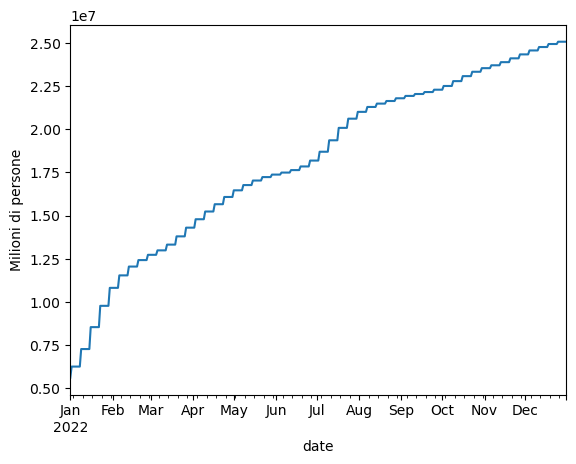

In [77]:
Italy_2022_df.total_cases.plot(ylabel="Milioni di persone")

Il grafico a linea sottostante riguarda l'andamento dei nuovi casi giornalieri nel 2022.  
Dopo il picco di gennaio/febbraio, la curva di contagio si è a poco a poco attenuata, con alcuni picci minori 
ad aprile e nei mesi estivi.

<Axes: xlabel='date', ylabel='Milioni di persone'>

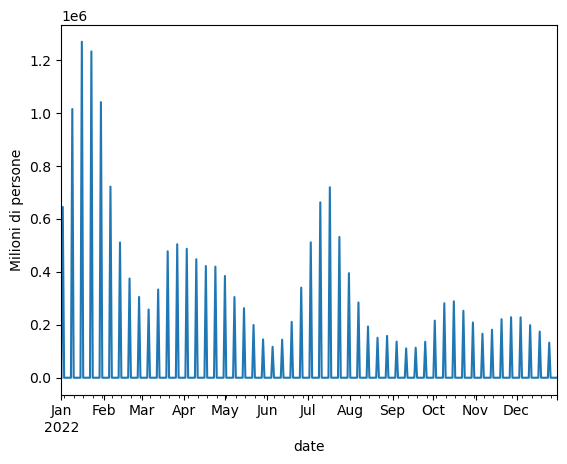

In [79]:
Italy_2022_df.new_cases.plot(ylabel="Milioni di persone")

Il grafico a linea sottostante riporta l'andamento della crescita dei nuovi casi 
durante il 2022.  
Il grafico non si differenzia di molto come andatura rispetto al grafico dei casi totali, 
a parte per il fatto che il primo grafico partiva da circa 500.000 come dato iniziale, 
mentre il seguente grafico inizia da 0, essendo considerati soltanto i nuovi contagiati nell'anno 2022.

<Axes: xlabel='date', ylabel='Milioni di persone'>

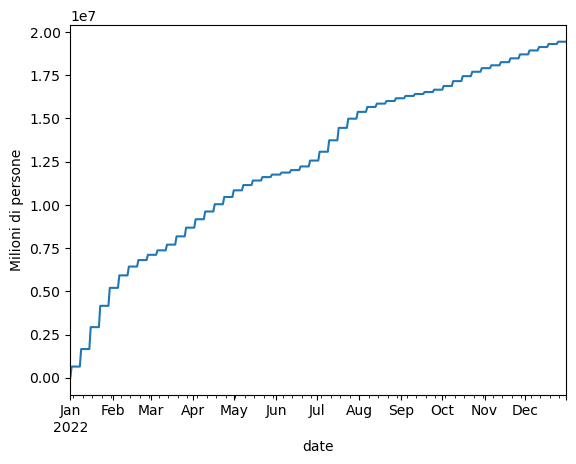

In [81]:
Italy_2022_df.new_cases.cumsum().plot(ylabel="Milioni di persone")

### Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo.

In [83]:
covid_icu = covid[(covid["location"].isin(["Italy", "Germany", "France"])) &  
                (covid["date"] >= "2022-05-01") & (covid["date"] <= "2023-04-30")]

In [85]:
covid_icu

iso_code continent location       date  total_cases  new_cases  \
124157      FRA    Europe   France 2022-05-01   27742592.0   376510.0   
124158      FRA    Europe   France 2022-05-02   27742592.0        0.0   
124159      FRA    Europe   France 2022-05-03   27742592.0        0.0   
124160      FRA    Europe   France 2022-05-04   27742592.0        0.0   
124161      FRA    Europe   France 2022-05-05   27742592.0        0.0   
...         ...       ...      ...        ...          ...        ...   
176483      ITA    Europe    Italy 2023-04-26   25772459.0        0.0   
176484      ITA    Europe    Italy 2023-04-27   25772459.0        0.0   
176485      ITA    Europe    Italy 2023-04-28   25772459.0        0.0   
176486      ITA    Europe    Italy 2023-04-29   25772459.0        0.0   
176487      ITA    Europe    Italy 2023-04-30   25795509.0    23050.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
124157           53787.143      146744.0       867.0              123.857   
124158           53787.143      146744.0         0.0              123.857   
124159           53787.143      146744.0         0.0              123.857   
124160           53787.143      146744.0         0.0              123.857   
124161           53787.143      146744.0         0.0              123.857   
...                    ...           ...         ...                  ...   
176483            3808.429      189627.0         0.0               26.714   
176484            3808.429      189627.0         0.0               26.714   
176485            3808.429      189627.0         0.0               26.714   
176486            3808.429      189627.0         0.0               26.714   
176487            3292.857      189786.0       159.0               22.714   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
124157  ...          35.6                     NaN                        5.98   
124158  ...          35.6                     NaN                        5.98   
124159  ...          35.6                     NaN                        5.98   
124160  ...          35.6                     NaN                        5.98   
124161  ...          35.6                     NaN                        5.98   
...     ...           ...                     ...                         ...   
176483  ...          27.8                     NaN                        3.18   
176484  ...          27.8                     NaN                        3.18   
176485  ...          27.8                     NaN                        3.18   
176486  ...          27.8                     NaN                        3.18   
176487  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
124157            82.66                    0.901  67813000.0   
124158            82.66                    0.901  67813000.0   
124159            82.66                    0.901  67813000.0   
124160            82.66                    0.901  67813000.0   
124161            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
176483            83.51                    0.892  59037472.0   
176484            83.51                    0.892  59037472.0   
176485            83.51                    0.892  59037472.0   
176486            83.51                    0.892  59037472.0   
176487            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
124157                              89526.72                         6.19   
124158                                   NaN                          NaN   
124159                                   NaN                          NaN   
124160                                   NaN                          NaN   
124161                                   NaN                          NaN   
.

In [87]:
icu_not_null = covid_icu.icu_patients.notna()

In [89]:
covid_icu = covid_icu.loc[icu_not_null]

In [91]:
covid_icu_located = covid_icu[["location","icu_patients"]]

In [93]:
covid_icu_located

location  icu_patients
124157   France        1557.0
124158   France        1511.0
124159   France        1498.0
124160   France        1465.0
124161   France        1447.0
...         ...           ...
176483    Italy         100.0
176484    Italy          99.0
176485    Italy         105.0
176486    Italy         111.0
176487    Italy         103.0

[1065 rows x 2 columns]

In [95]:
plt.figure(figsize=[10,5])
plt.grid("true")
covid_icu_located.groupby("location").boxplot(subplots= False, rot=45)

NameError: name 'plt' is not defined

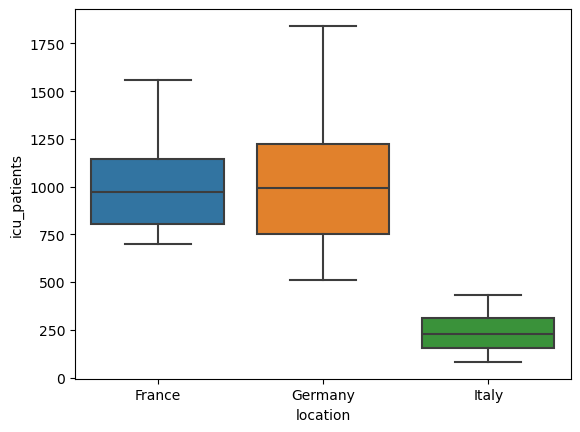

In [97]:
#Metodo alternativo per ottenere il boxplot
from matplotlib import pyplot as plt
names = ["icu_patients"]
plt.subplots(1)
sub = []
for name in names:
    ax = sns.boxplot(  y=name, x= "location", data=covid_icu,  orient='v' )
    sub.append(ax)
#Il risultato è lo stesso, anche se leggermente meno leggibile.

Rispetto a Francia e Germania, l'Italia ha un numero inferiore di pazienti in terapia intensiva, 
considerando il periodo tra maggio 2022 e aprile 2023. La Germania ha avuto un impatto maggiore 
per quanto concerne la terapia intensiva, superando anche le 1750 persone. Probabilmente questo 
è dovuto anche a una maggior disponibilità di posti letto, inoltre non è chiaro se le persone 
ospedalizzate siano tutte provenienti dalla Germania o se abbiano accolto altre persone da altre 
nazioni, lo stesso si può dire di Francia e Italia, specialmente quest'ultima potrebbe aver 
contribuito ad abbassare il carico ospedaliero critico degli altri paesi.

### Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna - se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [99]:
covid_located_2023 = covid[(covid["location"].isin(["Italy", "Germany", "France", "Spain"])) &  
                (covid["date"].dt.year == 2023)]

In [101]:
covid_located_2023

iso_code continent location       date  total_cases  new_cases  \
124402      FRA    Europe   France 2023-01-01   38141254.0   151707.0   
124403      FRA    Europe   France 2023-01-02   38141254.0        0.0   
124404      FRA    Europe   France 2023-01-03   38141254.0        0.0   
124405      FRA    Europe   France 2023-01-04   38141254.0        0.0   
124406      FRA    Europe   France 2023-01-05   38141254.0        0.0   
...         ...       ...      ...        ...          ...        ...   
346696      ESP    Europe    Spain 2023-12-27   13980340.0        NaN   
346697      ESP    Europe    Spain 2023-12-28   13980340.0        NaN   
346698      ESP    Europe    Spain 2023-12-29   13980340.0        NaN   
346699      ESP    Europe    Spain 2023-12-30   13980340.0        NaN   
346700      ESP    Europe    Spain 2023-12-31   13980340.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
124402           21672.429      162475.0       808.0              115.429   
124403           21672.429      162475.0         0.0              115.429   
124404           21672.429      162475.0         0.0              115.429   
124405           21672.429      162475.0         0.0              115.429   
124406           21672.429      162475.0         0.0              115.429   
...                    ...           ...         ...                  ...   
346696                 NaN      121852.0         NaN                  NaN   
346697                 NaN      121852.0         NaN                  NaN   
346698                 NaN      121852.0         NaN                  NaN   
346699                 NaN      121852.0         NaN                  NaN   
346700                 NaN      121852.0         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
124402  ...          35.6                     NaN                        5.98   
124403  ...          35.6                     NaN                        5.98   
124404  ...          35.6                     NaN                        5.98   
124405  ...          35.6                     NaN                        5.98   
124406  ...          35.6                     NaN                        5.98   
...     ...           ...                     ...                         ...   
346696  ...          31.4                     NaN                        2.97   
346697  ...          31.4                     NaN                        2.97   
346698  ...          31.4                     NaN                        2.97   
346699  ...          31.4                     NaN                        2.97   
346700  ...          31.4                     NaN                        2.97   

        life_expectancy  human_development_index  population  \
124402            82.66                    0.901  67813000.0   
124403            82.66                    0.901  67813000.0   
124404            82.66                    0.901  67813000.0   
124405            82.66                    0.901  67813000.0   
124406            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
346696            83.56                    0.904  47558632.0   
346697            83.56                    0.904  47558632.0   
346698            83.56                    0.904  47558632.0   
346699            83.56                    0.904  47558632.0   
346700            83.56                    0.904  47558632.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
124402                             122204.83                         6.64   
124403                                   NaN                          NaN   
124404                                   NaN                          NaN   
124405                                   NaN                          NaN   
124406                                   NaN                          NaN   
.

In [103]:
covid_located_2023.groupby("location")["hosp_patients"].sum()

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In base al dataset ricavato filtrando la colonna "location" per le nazioni Italia, Francia, 
Germania e Spagna e per l'anno 2023, ho sommato i dati relativi ai ricoverati in ospedale per ogni nazione.  
Il problema di questo metodo è che non tiene conto del fatto che la colonna "hosp_patients" dal quale si 
prende tali informazioni non siano un dato giornaliero, ma rappresentino il dato complessivo dei ricoverati 
registrati giorno per giorno.  
Alla luce di quanto riportato, propongo un metodo alternativo per giungere al risultato richiesto: prendere 
il valore massimo per ogni nazione.

In [105]:
covid_located_2023.groupby("location")["hosp_patients"].max()

location
France     24157.0
Germany        NaN
Italy       8409.0
Spain       3585.0
Name: hosp_patients, dtype: float64

Nel corso del 2023 la Francia supera i 24000 ricoverati in ospedale, 
l'Italia ne conta più di 8000 e la Spagna supera di poco i 3500 pazienti.  
Notiamo che la Germania non ha registrato alcun dato relativamente alle persone ospitalizzate. 
Probabilmente è frutto della decisione da parte del governo tedesco di non pubblicare i dati 
al riguardo. Conviene fare una riflessione dettagliata sui dati mancanti.

In [108]:
covid_located_2023_null = covid_located_2023.hosp_patients.isna()
covid_located_2023_null = covid_located_2023.loc[covid_located_2023_null]
covid_located_2023_null.groupby("location")["iso_code"].count()

location
France     275
Germany    365
Spain      203
Name: iso_code, dtype: int64

I dati nulli nel dataset ricavato sono 843. Di questi notiamo tutte le tuple riferite 
alla Germania, ma vediamo che anche la Francia e la Spagna non hanno più di 200 dati 
riguardanti alla ospedalizzazione. Nel caso di queste due nazioni potrebbe essere indicativo di un rilevamento 
statistico più saltuario (sicuramente più di un dato fornito a settimana), oppure potrebbero aver adottato, 
da un certo periodo all'anno, una decisione simile alla Germania nel non voler più pubblicare i dati 
riguardanti i ricoverati. Dobbiamo far presente che nel maggio del 2023 l'Organizzazione Mondiale della Sanità ha dichiarato la conclusione dell'emergenza sanitaria da Covid-19.  

In base all'analisi dei dati qui riportata non conviene eliminare i dati mancanti né riempirli con dei valori 
interpolati, poiché andrebbero a modificare seriamente la realtà delle registrazioni: pensiamo, ad esempio, al 
caso della Germania, che avrebbe rappresentato un totale di persone ospitalizzate mai registrato nell'anno 
2023. Qualora vi fosse necessità di implementazione è preferibile cercare delle fonti affidabili per colmare l'assenza dei dati richiesti.